In [13]:
import pickle

from sage.all import sigma, nth_prime
from sage.arith.all import moebius

import ast

def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)


def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans=ans+step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tau_prime(k):
            pn=nth_prime(k)
            return tau(pn)

#for k in range(1, 501):
#    tau_prime_list.append([k,tau_prime(k)])
#    if k%100==0:
#       print(k)

#with open('/Users/barrybrent/data/run26oct25no1.txt', 'wb') as wfile:
#    pickle.dump(tau_prime_list, wfile) #output snipped

with open('/Users/barrybrent/data/run26oct25no1.txt', 'rb') as rfile:
    tau_prime_list = pickle.load(rfile)

h_list=[[0,1]]+tau_prime_list 

j_list=[(0,1),(1,1)] #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< (0,1) gives c=1

for n in [1..500]:# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r][1] 
    j_n=n*h_list[n][1]-sm
    j_list.append((n,j_n))
    if n%50==0:
        print(("j",n))

deformed_h_list=[(0,1)]
for n in range(1,500): # equation D1 of lemma 2.1
    summ=0
    for r in range(1,n+1):
        summ+=j_list[r][1]*deformed_h_list[n-r][1]
    deformed_h_list.append((n,summ/n))
    if n%50==0:
        print(("h",n))

over_factorial_n=[(pair[0],pair[1]/factorial(n)) for pair in deformed_h_list]

print("h_list values:")
lst=[pair[1] for pair in h_list]
print(lst[:10])

print()
print("deformed_h_list values:")
lst=[pair[1] for pair in deformed_h_list]
print(lst[:10])

import math

def first_nonfinite_index(seq):
    for n, v in seq:
        try:
            fv = float(v)
        except Exception as e:
            return n, v, f"float conversion failed: {e}"
        if not math.isfinite(fv):
            return n, v, fv
    return None

result = first_nonfinite_index(deformed_h_list)

if result is None:
    print("All values remain finite under float conversion.")
else:
    n, exact_val, float_val = result
    print("First non-finite value occurs at:")
    print("  n =", n)
    print("  exact value =", exact_val)
    print("  float(value) =", float_val)


#print()


('j', 50)
('j', 100)
('j', 150)
('j', 200)
('j', 250)
('j', 300)
('j', 350)
('j', 400)
('j', 450)
('j', 500)
('h', 50)
('h', 100)
('h', 150)
('h', 200)
('h', 250)
('h', 300)
('h', 350)
('h', 400)
('h', 450)
h_list values:
[1, -24, 252, 4830, -16744, 534612, -577738, -6905934, 10661420, 18643272]

deformed_h_list values:
[1, 1, -23/2, 985/6, 87781/24, -1098683/120, 333612037/720, -2305343051/5040, -28246957387/8064, -8145447106103/362880]
First non-finite value occurs at:
  n = 311
  exact value = -40467099528059011925955953941649668901482384934917438983053913787920557117900035873546442355895274508323808801141270836567144534305741438156455623988989710671307171195378657929802715066087019497466175966690262392357782743019896968444522344434424881254831212579045386203804765307874188997596043315497231901442486824917696352342781117602823206118215532438689263842389491866200240668795836562282275577121376898555649748803192535329611959708676589734345626367843348273402077168535969707383648055206573

In [ ]:
#print("over factorial values:")
#lst=[pair[1] for pair in over_factorial_n]
#print(lst[:10])


with open('/Users/barrybrent/data2/run8feb26no1.txt', 'wb') as wfile:
    pickle.dump(deformed_h_list, wfile) # ouput snipped

with open('/Users/barrybrent/data2/run8feb26no2.txt', 'wb') as wfile:
    pickle.dump(over_factorial_n, wfile) # ouput snipped

# Increase PARI stack size to handle large polynomial root computations
pari.allocatemem(7*10^9)  # Allocate 7GB for PARI stack


def periodic_behavior_score(input_list, min_score=0.3, max_period=100):
    """
    Analyzes periodic behavior for all v values in main_local_minima_list.
    Uses autocorrelation and FFT to detect ANY periodic pattern (not just sine waves).
    Filters out results with weak periodicity or unreasonably large periods.
    
    Args:
        main_local_minima_list: List of tuples [(v1, points1), (v2, points2), ...]
                                where points are [(x1, y1), (x2, y2), ...]
        min_score: Minimum periodicity score to accept (default: 0.3)
        max_period: Maximum allowed period (default: 100). Results with larger periods are rejected.
    
    Returns:
        results: List of tuples [(v, score, info_dict), ...] for valid results only
    """
    
    results = []
    rejected = []
    
    print("=" * 80)
    print("PERIODIC BEHAVIOR ANALYSIS RESULTS")
    print(f"(Rejecting: score < {min_score} or period > {max_period})")
    print("=" * 80)
    
    for points in input_list:
        if len(points) < 4:
            continue
        
        # Extract x and y coordinates, converting to plain floats
        x_data = np.array([float(p[0]) for p in points])
        y_data = np.array([float(p[1]) for p in points])
        
        # Remove mean (detrend)
        y_detrended = y_data - np.mean(y_data)
        
        # --- Method 1: Autocorrelation Analysis ---
        autocorr = correlate(y_detrended, y_detrended, mode='full')
        autocorr = autocorr[len(autocorr)//2:]
        autocorr = autocorr / autocorr[0]  # Normalize
        
        # Find peaks in autocorrelation (excluding the first peak at lag=0)
        peaks, properties = find_peaks(autocorr[1:], prominence=0.1, distance=3)
        peaks = peaks + 1  # Adjust for excluding first element
        
        # Calculate periodicity score from autocorrelation
        if len(peaks) > 0:
            autocorr_score = autocorr[peaks[0]] if peaks[0] < len(autocorr) else 0
            spacing = np.mean(np.diff(x_data))
            autocorr_period = peaks[0] * spacing
        else:
            autocorr_score = 0
            autocorr_period = None
        
        # --- Method 2: FFT Analysis ---
        n = len(y_detrended)
        yf = fft(y_detrended)
        spacing = np.mean(np.diff(x_data))
        xf = fftfreq(n, spacing)[:n//2]
        power = 2.0/n * np.abs(yf[:n//2])
        
        if len(power) > 1:
            dominant_freq_idx = np.argmax(power[1:]) + 1
            dominant_freq = xf[dominant_freq_idx]
            fft_period = 1/dominant_freq if dominant_freq > 0 else None
            
            # FFT score: ratio of dominant peak to mean power
            mean_power = np.mean(power[1:])
            fft_score = power[dominant_freq_idx] / mean_power if mean_power > 0 else 0
            fft_score = min(fft_score / 10, 1.0)  # Normalize to 0-1 range
        else:
            fft_period = None
            fft_score = 0
            dominant_freq = 0
        
        # --- Combined Score ---
        combined_score = (autocorr_score + fft_score) / 2
        
        # Determine best period estimate
        if autocorr_period and fft_period:
            # Use autocorr period if both are available and similar
            if abs(autocorr_period - fft_period) / max(autocorr_period, fft_period) < 0.3:
                best_period = autocorr_period
                period_confidence = "high"
            else:
                # Use the one with higher score
                best_period = autocorr_period if autocorr_score > fft_score else fft_period
                period_confidence = "moderate"
        elif autocorr_period:
            best_period = autocorr_period
            period_confidence = "moderate"
        elif fft_period:
            best_period = fft_period
            period_confidence = "low"
        else:
            best_period = None
            period_confidence = "none"
        
        # Check rejection criteria
        rejection_reason = None
        if combined_score < min_score:
            rejection_reason = f"score = {combined_score:.3f} (too low)"
        elif best_period and best_period > max_period:
            rejection_reason = f"period = {best_period:.2f} (too large)"
        
        if rejection_reason:
            print(f"\nREJECTED v = {v}: {rejection_reason}")
            print(f"  ({len(peaks)} autocorrelation peaks found)")
            rejected.append((v, combined_score, best_period))
            continue
        
        # Package results
        info_dict = {
            'combined_score': combined_score,
            'autocorr_score': autocorr_score,
            'autocorr_period': autocorr_period,
            'autocorr_peaks': len(peaks),
            'fft_score': fft_score,
            'fft_period': fft_period,
            'dominant_frequency': dominant_freq,
            'best_period': best_period,
            'period_confidence': period_confidence
        }
        
        results.append((v, combined_score, info_dict))
        
        print(f"\nAnalyzing v = {v}:")
        print(f"  Autocorrelation peaks found: {len(peaks)}")
        print(f"  Combined periodicity score = {combined_score:.6f}")
        print(f"  Best period estimate = {best_period:.4f} (confidence: {period_confidence})")
        print(f"  Autocorrelation: score = {autocorr_score:.4f}, period = {(autocorr_period if autocorr_period else 0):.4f}")
        print(f"  FFT: score = {fft_score:.4f}, period = {(fft_period if fft_period else 0):.4f}")
        print(f"  Dominant frequency = {dominant_freq:.6f}")
    
    print("\n" + "=" * 80)
    print(f"ANALYSIS COMPLETE: {len(results)} valid results, {len(rejected)} rejected")
    print("=" * 80)
    
    return results

print()
print("deformed_h_list")
p = list_plot(deformed_h_list, plotjoined=True, axes_labels=['', ''])    
p.show()
print()
print(periodic_behavior_score(deformed_h_list, min_score=0.3, max_period=100))
     

('j', 50)
('j', 100)
('j', 150)
('j', 200)
('j', 250)
('j', 300)
('h', 50)
('h', 100)
('h', 150)
('h', 200)
('h', 250)
h_list values:
[1, -24, 252, 4830, -16744, 534612, -577738, -6905934, 10661420, 18643272]

deformed_h_list values:
[1, 1, -23/2, 985/6, 87781/24, -1098683/120, 333612037/720, -2305343051/5040, -28246957387/8064, -8145447106103/362880]
All values remain finite under float conversion.
PARI stack size set to 7000000000 bytes, maximum size set to 7000002560

deformed_h_list


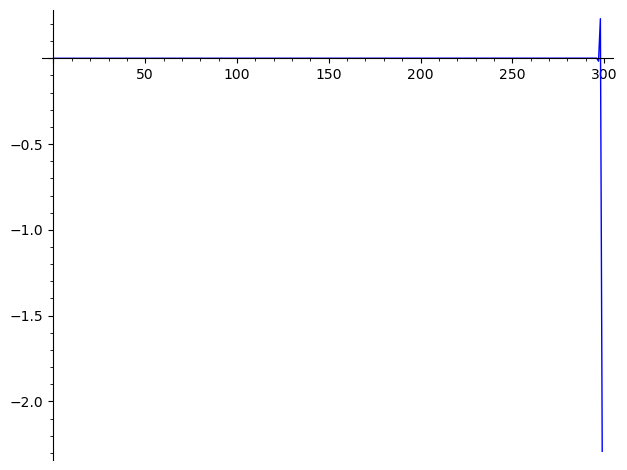


PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
[]


In [14]:
import pickle

from sage.all import sigma, nth_prime
from sage.arith.all import moebius

import ast

def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)


def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans=ans+step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tau_prime(k):
            pn=nth_prime(k)
            return tau(pn)

#for k in range(1, 501):
#    tau_prime_list.append([k,tau_prime(k)])
#    if k%100==0:
#       print(k)

#with open('/Users/barrybrent/data/run26oct25no1.txt', 'wb') as wfile:
#    pickle.dump(tau_prime_list, wfile) #output snipped

with open('/Users/barrybrent/data/run26oct25no1.txt', 'rb') as rfile:
    tau_prime_list = pickle.load(rfile)

h_list=[[0,1]]+tau_prime_list 

j_list=[(0,1),(1,1)] #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< (0,1) gives c=1

for n in [1..300]:# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r][1] 
    j_n=n*h_list[n][1]-sm
    j_list.append((n,j_n))
    if n%50==0:
        print(("j",n))

deformed_h_list=[(0,1)]
for n in range(1,300): # equation D1 of lemma 2.1
    summ=0
    for r in range(1,n+1):
        summ+=j_list[r][1]*deformed_h_list[n-r][1]
    deformed_h_list.append((n,summ/n))
    if n%50==0:
        print(("h",n))

over_factorial_n=[(pair[0],pair[1]/factorial(n)) for pair in deformed_h_list]

print("h_list values:")
lst=[pair[1] for pair in h_list]
print(lst[:10])

print()
print("deformed_h_list values:")
lst=[pair[1] for pair in deformed_h_list]
print(lst[:10])

import math

def first_nonfinite_index(seq):
    for n, v in seq:
        try:
            fv = float(v)
        except Exception as e:
            return n, v, f"float conversion failed: {e}"
        if not math.isfinite(fv):
            return n, v, fv
    return None

result = first_nonfinite_index(deformed_h_list)

if result is None:
    print("All values remain finite under float conversion.")
else:
    n, exact_val, float_val = result
    print("First non-finite value occurs at:")
    print("  n =", n)
    print("  exact value =", exact_val)
    print("  float(value) =", float_val)


#print()
#print("over factorial values:")
#lst=[pair[1] for pair in over_factorial_n]
#print(lst[:10])


with open('/Users/barrybrent/data2/run8feb26no1.txt', 'wb') as wfile:
    pickle.dump(deformed_h_list, wfile) # ouput snipped

with open('/Users/barrybrent/data2/run8feb26no2.txt', 'wb') as wfile:
    pickle.dump(over_factorial_n, wfile) # ouput snipped

# Increase PARI stack size to handle large polynomial root computations
pari.allocatemem(7*10^9)  # Allocate 7GB for PARI stack


def periodic_behavior_score(input_list, min_score=0.3, max_period=100):
    """
    Analyzes periodic behavior for all v values in main_local_minima_list.
    Uses autocorrelation and FFT to detect ANY periodic pattern (not just sine waves).
    Filters out results with weak periodicity or unreasonably large periods.
    
    Args:
        main_local_minima_list: List of tuples [(v1, points1), (v2, points2), ...]
                                where points are [(x1, y1), (x2, y2), ...]
        min_score: Minimum periodicity score to accept (default: 0.3)
        max_period: Maximum allowed period (default: 100). Results with larger periods are rejected.
    
    Returns:
        results: List of tuples [(v, score, info_dict), ...] for valid results only
    """
    
    results = []
    rejected = []
    
    print("=" * 80)
    print("PERIODIC BEHAVIOR ANALYSIS RESULTS")
    print(f"(Rejecting: score < {min_score} or period > {max_period})")
    print("=" * 80)
    
    for points in input_list:
        if len(points) < 4:
            continue
        
        # Extract x and y coordinates, converting to plain floats
        x_data = np.array([float(p[0]) for p in points])
        y_data = np.array([float(p[1]) for p in points])
        
        # Remove mean (detrend)
        y_detrended = y_data - np.mean(y_data)
        
        # --- Method 1: Autocorrelation Analysis ---
        autocorr = correlate(y_detrended, y_detrended, mode='full')
        autocorr = autocorr[len(autocorr)//2:]
        autocorr = autocorr / autocorr[0]  # Normalize
        
        # Find peaks in autocorrelation (excluding the first peak at lag=0)
        peaks, properties = find_peaks(autocorr[1:], prominence=0.1, distance=3)
        peaks = peaks + 1  # Adjust for excluding first element
        
        # Calculate periodicity score from autocorrelation
        if len(peaks) > 0:
            autocorr_score = autocorr[peaks[0]] if peaks[0] < len(autocorr) else 0
            spacing = np.mean(np.diff(x_data))
            autocorr_period = peaks[0] * spacing
        else:
            autocorr_score = 0
            autocorr_period = None
        
        # --- Method 2: FFT Analysis ---
        n = len(y_detrended)
        yf = fft(y_detrended)
        spacing = np.mean(np.diff(x_data))
        xf = fftfreq(n, spacing)[:n//2]
        power = 2.0/n * np.abs(yf[:n//2])
        
        if len(power) > 1:
            dominant_freq_idx = np.argmax(power[1:]) + 1
            dominant_freq = xf[dominant_freq_idx]
            fft_period = 1/dominant_freq if dominant_freq > 0 else None
            
            # FFT score: ratio of dominant peak to mean power
            mean_power = np.mean(power[1:])
            fft_score = power[dominant_freq_idx] / mean_power if mean_power > 0 else 0
            fft_score = min(fft_score / 10, 1.0)  # Normalize to 0-1 range
        else:
            fft_period = None
            fft_score = 0
            dominant_freq = 0
        
        # --- Combined Score ---
        combined_score = (autocorr_score + fft_score) / 2
        
        # Determine best period estimate
        if autocorr_period and fft_period:
            # Use autocorr period if both are available and similar
            if abs(autocorr_period - fft_period) / max(autocorr_period, fft_period) < 0.3:
                best_period = autocorr_period
                period_confidence = "high"
            else:
                # Use the one with higher score
                best_period = autocorr_period if autocorr_score > fft_score else fft_period
                period_confidence = "moderate"
        elif autocorr_period:
            best_period = autocorr_period
            period_confidence = "moderate"
        elif fft_period:
            best_period = fft_period
            period_confidence = "low"
        else:
            best_period = None
            period_confidence = "none"
        
        # Check rejection criteria
        rejection_reason = None
        if combined_score < min_score:
            rejection_reason = f"score = {combined_score:.3f} (too low)"
        elif best_period and best_period > max_period:
            rejection_reason = f"period = {best_period:.2f} (too large)"
        
        if rejection_reason:
            print(f"\nREJECTED v = {v}: {rejection_reason}")
            print(f"  ({len(peaks)} autocorrelation peaks found)")
            rejected.append((v, combined_score, best_period))
            continue
        
        # Package results
        info_dict = {
            'combined_score': combined_score,
            'autocorr_score': autocorr_score,
            'autocorr_period': autocorr_period,
            'autocorr_peaks': len(peaks),
            'fft_score': fft_score,
            'fft_period': fft_period,
            'dominant_frequency': dominant_freq,
            'best_period': best_period,
            'period_confidence': period_confidence
        }
        
        results.append((v, combined_score, info_dict))
        
        print(f"\nAnalyzing v = {v}:")
        print(f"  Autocorrelation peaks found: {len(peaks)}")
        print(f"  Combined periodicity score = {combined_score:.6f}")
        print(f"  Best period estimate = {best_period:.4f} (confidence: {period_confidence})")
        print(f"  Autocorrelation: score = {autocorr_score:.4f}, period = {(autocorr_period if autocorr_period else 0):.4f}")
        print(f"  FFT: score = {fft_score:.4f}, period = {(fft_period if fft_period else 0):.4f}")
        print(f"  Dominant frequency = {dominant_freq:.6f}")
    
    print("\n" + "=" * 80)
    print(f"ANALYSIS COMPLETE: {len(results)} valid results, {len(rejected)} rejected")
    print("=" * 80)
    
    return results

print()
print("deformed_h_list")
p = list_plot(deformed_h_list, plotjoined=True, axes_labels=['', ''])    
p.show()
print()
print(periodic_behavior_score(deformed_h_list, min_score=0.3, max_period=100))
     